In [ ]:
# import tabula
# import pandas as pd

In [ ]:
# pdf = tabula.read_pdf('labs.pdf', area=(128.725,159.976,768.629,1183.823), lattice=True, pages='all')

In [ ]:
# tables = pdf
# for t in tables:
#    t.dropna(axis=0, how="all", inplace=True)
#    t.dropna(axis=1, how="all", inplace=True)

# labs = pd.concat(tables)

In [ ]:
## pdfplumber

In [16]:
import pdfplumber
import pandas as pd
from datetime import datetime
import urllib.request as request


In [17]:
today = datetime.today()
url = f"https://covid19.min-saude.pt/wp-content/uploads/{today.strftime('%Y')}/{today.strftime('%m')}/{today.strftime('%Y%m%d')}_LAB.REFERENCIADOS.pdf"

request.urlretrieve(url, "labs.pdf")

('labs.pdf', <http.client.HTTPMessage at 0x7f4723a9a070>)

In [19]:
pdf = pdfplumber.open("labs.pdf")

dfs = []
columns = ["ars", "aces", "name", "address", "phone", "email", "schedule", "reservation", "presencial", "drive", "domicile"]

table_settings = {
    "intersection_x_tolerance": 1,
}

In [20]:
for i, page in enumerate(pdf.pages):
    table = page.extract_table(table_settings)
    
    df = pd.DataFrame(table[1:], columns=columns)

    for c in columns:
        df[c] = df[c].str.replace("\n", "")
        df[c] = df[c].str.replace("---", "")

    df["name"] = df["name"].str.replace("Posto de Colheita Laboratorial Covid-19", "")
    
    dfs.append(df)

In [25]:
labs = pd.concat(dfs, ignore_index= True)
json = labs.to_dict('records')
json
#labs.to_csv('./labs.csv')

[{'ars': 'ARS Norte',
  'aces': 'ACES Alto Minho',
  'name': ' Viana do Castelo (Germano de Sousa)',
  'address': 'Rua D. Moisés Alves de Pinho 4900-314 Viana do Castelo',
  'phone': '969030806',
  'email': 'covid19.viana@germanodesousa.com',
  'schedule': '2ª a 6ª feira e sábados: 09H às 13H | 14H às 17H; Domingos e feriados: Encerrado',
  'reservation': 'Obrigatória',
  'presencial': 'Sim',
  'drive': 'Não tem',
  'domicile': 'Não'},
 {'ars': 'ARS Norte',
  'aces': 'ACES Alto Minho',
  'name': ' Valença (Laboratório Dra. Helena Rodrigues)',
  'address': 'Avenida Dr. Tito Fontes, nº 31 4930-673 Valença',
  'phone': '251249900 ',
  'email': 'laboratorio@helenarodriguesanalisesclinicas.pt',
  'schedule': 'De 2ª a 6ª feira: 08H às 13H | 14H às 18H; Sábados, domingos e feriados: Encerrado',
  'reservation': 'Obrigatória',
  'presencial': 'Sim',
  'drive': 'Não tem',
  'domicile': 'Sim'},
 {'ars': 'ARS Norte',
  'aces': 'ACES Alto Minho',
  'name': ' Arcos de Valdevez (Laboratório Dra. Hel

In [ ]:
##########

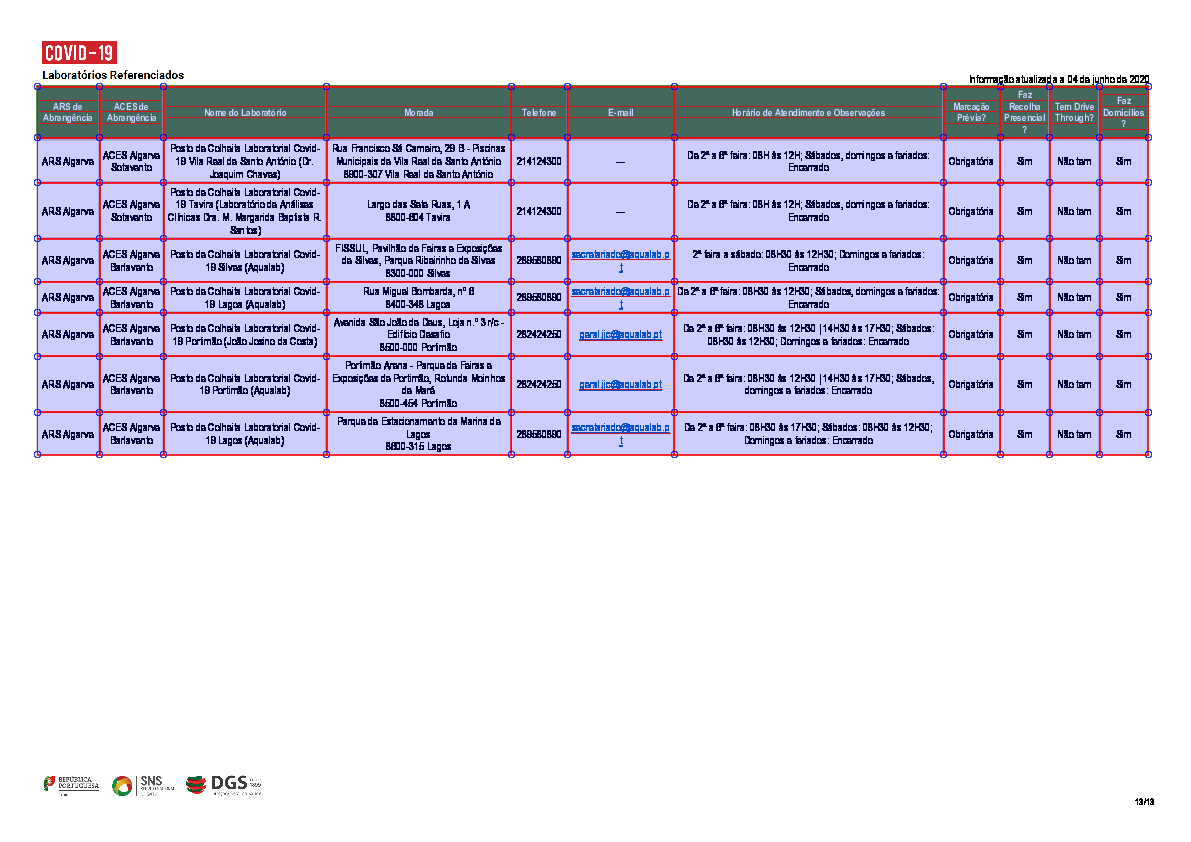

In [25]:
## image debugging
im = page.to_image()
im

table_settings = {
    "intersection_x_tolerance": 1,
}

im.reset().debug_tablefinder(table_settings)